In [29]:
import streamlit as st 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

df = pd.read_csv(r'C:\Users\etuna\OneDrive\Documents\metadata.csv')    

C:\Users\etuna\AppData\Local\Temp\ipykernel_7520\2071491275.py:9: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\etuna\OneDrive\Documents\metadata.csv')


In [30]:
print(df.head(10))

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   
5  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
6  5yhe786e  3bb07ea10432f7738413dff9816809cc90f03f99      PMC   
7  8zchiykl  5806726a24dc91de3954001effbdffd7a82d54e2      PMC   
8  8qnrcgnk  faaf1022ccfe93b032c5608097a53543ba24aedb      PMC   
9  jg13scgo  5b44feca5d6ffaaeb66501fa84cc6dd44d06660a      PMC   

                                               title  \
0  Clinical features of culture-proven Mycoplasma...   
1  Nitric oxide: a pro-inflammatory mediator in l...   
2    Surfactant protein-D and pulmonary host defense   
3               Role of endothelin-1 in lung dise

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [32]:
print("shape:", df.shape)

shape: (1056660, 19)


In [33]:
#Generate basic statistics for numerical columns (if any)
print(df.describe())

       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


In [34]:
print(df.columns)

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')


In [35]:
print(df.dtypes)

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [36]:
# Check for missing values in important columns
important_columns = ['title', 'abstract', 'publish_time', 'authors']
print(df[important_columns].isnull().sum())

title              503
abstract        235544
publish_time      1814
authors          23869
dtype: int64


In [37]:
# Generate basic statistics for numerical columns (if any)
print(df.describe())

       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


In [38]:
print(df.isnull().sum())

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64


In [39]:
#checking for missing values in all columns
values = df.isnull().sum()
print(values/len(df) * 100)

cord_uid              0.000000
sha                  64.627600
source_x              0.000000
title                 0.047603
doi                  37.843772
pmcid                63.131849
pubmed_id            52.782163
license               0.000000
abstract             22.291371
publish_time          0.171673
authors               2.258910
journal               8.263964
mag_id              100.000000
who_covidence_id     54.296084
arxiv_id             98.651506
pdf_json_files       64.627600
pmc_json_files       70.118865
url                  34.990063
s2_id                 7.589196
dtype: float64


In [40]:
# Create a cleaned version of the dataset by dropping rows with missing values in important columns
important_columns = ['title', 'abstract', 'publish_time', 'authors']
df_cleaned = df.dropna(subset=important_columns).copy()

# Optionally, reset the index
df_cleaned.reset_index(drop=True, inplace=True)

# Show the shape of the cleaned dataset
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

# Preview the cleaned data
print(df_cleaned.head())

Original shape: (1056660, 19)
Cleaned shape: (814277, 19)
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  P

In [41]:
# Convert 'publish_time' to datetime format
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce')

# Extract year from 'publish_time'
df_cleaned['year'] = df_cleaned['publish_time'].dt.year  

# Create a new column for abstract word count
df_cleaned['abstract_word_count'] = df_cleaned['abstract'].fillna('').apply(lambda x: len(x.split()))

# Preview the updated DataFrame
print(df_cleaned[['publish_time', 'year', 'abstract_word_count']].head())

  publish_time    year  abstract_word_count
0   2001-07-04  2001.0                  262
1   2000-08-15  2000.0                  142
2   2000-08-25  2000.0                  219
3   2001-02-22  2001.0                   68
4   2001-05-11  2001.0                  110


In [42]:
# Count papers by year
papers_per_year = df_cleaned['year'].value_counts().sort_index()
print(papers_per_year)

year
1955.0         1
1957.0         1
1962.0         1
1963.0         1
1964.0         1
           ...  
2019.0      5107
2020.0    117497
2021.0    181645
2022.0     74077
2023.0         1
Name: count, Length: 61, dtype: int64


In [43]:
# Top 10 journals by publication count
top_journals = df_cleaned['journal'].value_counts().head(10)
print(top_journals)

journal
PLoS One                           9922
bioRxiv                            8960
Int J Environ Res Public Health    8192
Sci Rep                            5829
Cureus                             4195
BMJ Open                           3494
Viruses                            3400
Front Psychol                      3365
Front Immunol                      3245
Sustainability                     3119
Name: count, dtype: int64


In [44]:

# Combine all titles, split into words, and count
all_titles = ' '.join(df_cleaned['title'].dropna()).lower()
words = re.findall(r'\b\w+\b', all_titles)
common_words = Counter(words).most_common(20)
print(common_words)

[('of', 607906), ('and', 454533), ('the', 441046), ('in', 431108), ('covid', 358585), ('19', 353174), ('a', 293850), ('for', 167733), ('with', 133175), ('to', 125605), ('on', 106706), ('pandemic', 105099), ('2', 93025), ('during', 89376), ('sars', 85685), ('cov', 81722), ('patients', 75040), ('study', 69871), ('from', 59851), ('an', 53728)]


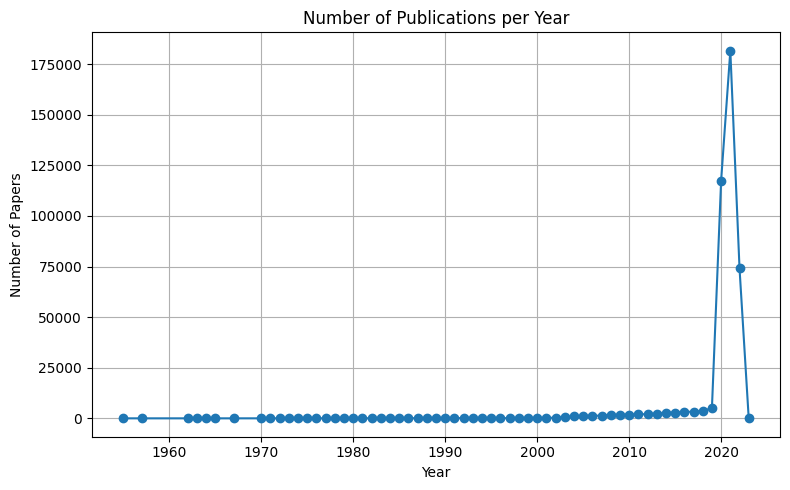

In [45]:
plt.figure(figsize=(8,5))
papers_per_year.plot(kind='line', marker='o')
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.tight_layout()
plt.show()

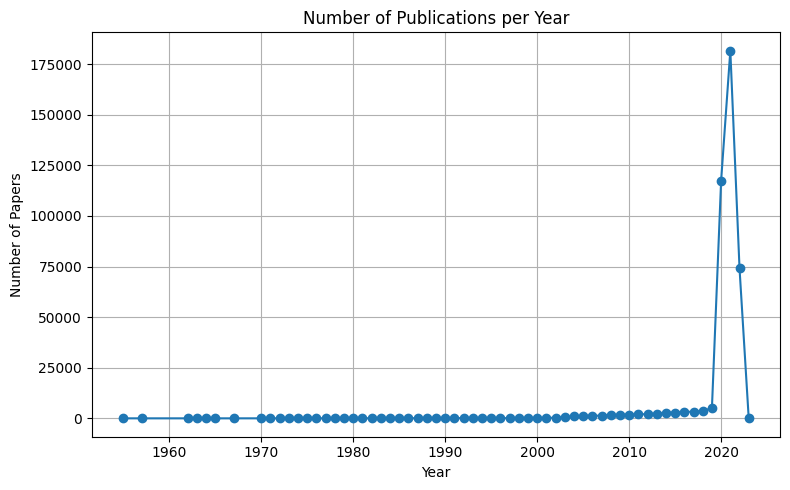

In [46]:
plt.figure(figsize=(8,5))
papers_per_year.plot(kind='line', marker='o')
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.tight_layout()
plt.show()

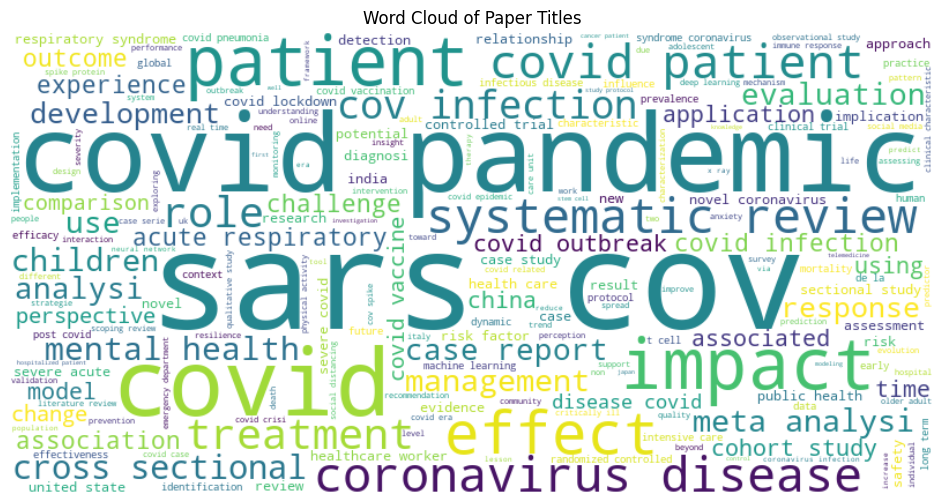

In [47]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()

C:\Users\etuna\AppData\Local\Temp\ipykernel_7520\3770189658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette='mako')


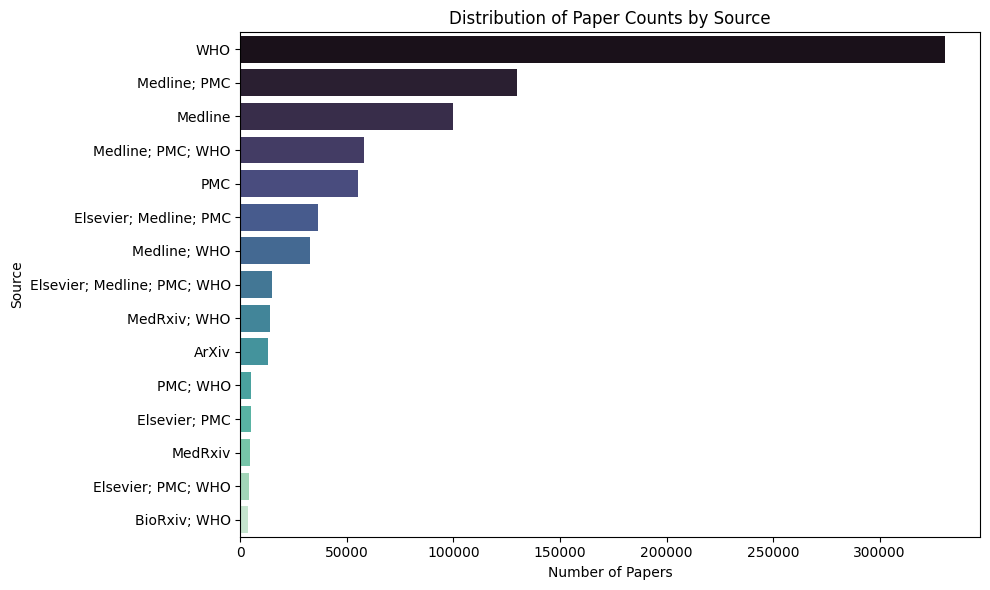

In [48]:
plt.figure(figsize=(10,6))
source_counts = df_cleaned['source_x'].value_counts().head(15)
sns.barplot(x=source_counts.values, y=source_counts.index, palette='mako')
plt.title("Distribution of Paper Counts by Source")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.tight_layout()
plt.show()